In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

## Example 1

In [2]:
data = np.array([[[(i+j) / 100] for j in range(5)] for i in range(100)], dtype=np.float)
target = np.array([(i+5)/100 for i in range(100)], dtype=np.float)

print("Shapes: data {}, target {}".format(np.shape(data), np.shape(target)))

Shapes: data (100, 5, 1), target (100,)


In [3]:
for i in range(len(data)):
    print("{} ------> {}".format(data[i], target[i]))
    if i==2 : break

[[0.  ]
 [0.01]
 [0.02]
 [0.03]
 [0.04]] ------> 0.05
[[0.01]
 [0.02]
 [0.03]
 [0.04]
 [0.05]] ------> 0.06
[[0.02]
 [0.03]
 [0.04]
 [0.05]
 [0.06]] ------> 0.07


In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)
print(x_train.shape, y_train.shape)

(80, 5, 1) (80,)


In [16]:
model = Sequential()
model.add(LSTM((1), batch_input_shape=(None, 5, 1) , return_sequences=False))
model.compile(loss="mean_absolute_error", optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 1)                 12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test), verbose=0)

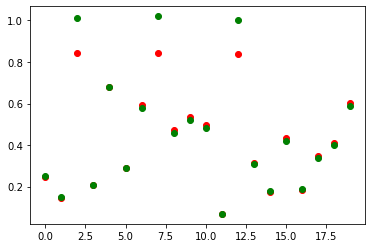

In [7]:
results = model.predict(x_test)
plt.scatter(range(20), results, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

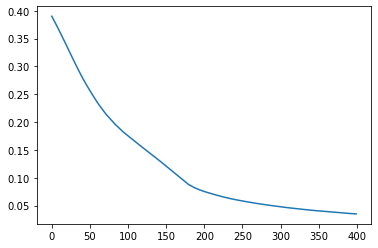

In [8]:
plt.plot(history.history['loss'])

In [20]:
model = Sequential()
model.add(LSTM((30), batch_input_shape=(None, 5, 1) , return_sequences=True))
model.add(LSTM((1), batch_input_shape=(None, 5, 1) , return_sequences=False))
model.compile(loss="mean_absolute_error", optimizer="adam", metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 30)             3840      
_________________________________________________________________
lstm_9 (LSTM)                (None, 1)                 128       
Total params: 3,968
Trainable params: 3,968
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(x_train, y_train, epochs=90, validation_data=(x_test, y_test), verbose=0)

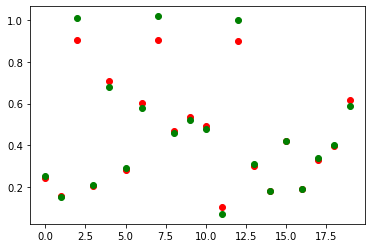

In [22]:
results = model.predict(x_test)
plt.scatter(range(20), results, c='r')
plt.scatter(range(20), y_test, c='g')
plt.show()

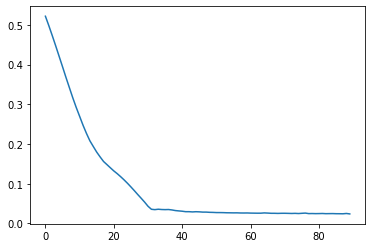

In [23]:
plt.plot(history.history['loss'])

## Example 2